# Tarea 4

Integrantes:
- Gabriel Alvarez
- Diego León
- Juan Pablo Marín
- César Soto

## Introducción

## Carga de datos y análisis exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
nombres_columnas = ['Id_number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass']
df = pd.read_csv('glass.data', header=None, names=nombres_columnas)

In [3]:
df.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
df.Type_of_glass.unique()

array([1, 2, 3, 5, 6, 7])

In [6]:
#no hay registros nulos

In [7]:
df['Id_number'].nunique()
#hay 214 elementos distintos en esta columna, por lo que es una primary key
#nota: en una primary key no se repiten elementos, de modo que, no hay filas repetidas en este 
#ya que tiene una primary key 
#esta columna no es de utilidad para ser ingresada como data para un modelo de ml
#dao que, ofrece un maximo de variabilidad, en otras palabras no aporta con ningun patron 

214

In [8]:
df.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: >

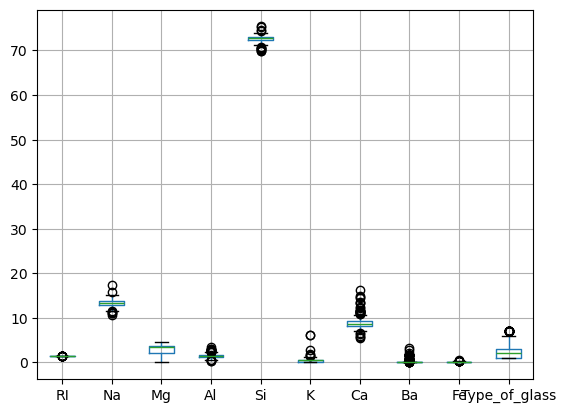

In [9]:
df.iloc[:,1:].boxplot()

In [10]:
#comentar que no se encuentran errores ni 

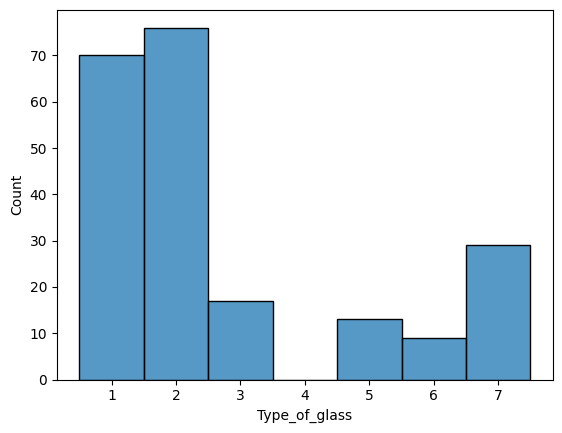

In [84]:
sns.histplot(df,x='Type_of_glass',discrete=True)
plt.show()

In [7]:
#info desde la medatada. No hay registros del tipo 4
target_names = {
1: 'building_windows_float_processed',
2: 'building_windows_non_float_processed',
3: 'vehicle_windows_float_processed',
4: 'vehicle_windows_non_float_processed (none in this database)',
5: 'containers',
6: 'tableware',
7: 'headlamps' }

## Modelos

In [8]:
X = df[nombres_columnas[1:-1]]

In [9]:
X = df[nombres_columnas[1:-1]]

#data y target
X = df[nombres_columnas[1:-1]]
y = df['Type_of_glass']

In [10]:
#Estandarización
normalizador = MinMaxScaler()
X = normalizador.fit_transform(X)


### Métodos no supervisados

In [13]:
#PCA (OPCIONAL)
pca = PCA(2,random_state=17)
X_pca = pca.fit_transform(X)

In [14]:
X.shape

(214, 9)

In [15]:
X_pca.shape

(214, 2)

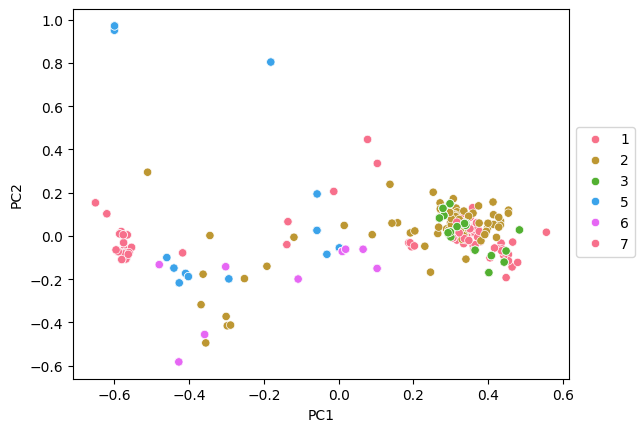

In [26]:
df_pca = pd.DataFrame(X_pca,columns=['PC1', 'PC2'])
df_pca['Type_of_glass'] = y


sns.scatterplot(
   data=df_pca,
    x='PC1',
    y='PC2',
    hue='Type_of_glass',
    palette='husl'
)
plt.legend(bbox_to_anchor=(1, .7, 0, 0))
plt.show()

In [ ]:
#Las categorias parecieran no ser linealmente separable, por lo que se recomienda usar modelos de clasificacion no lineales

### Métodos supervisados

Función customizada para matriz de confusión

In [16]:
def custom_confusion_matrix(y_test, y_pred, display_labels):
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = confusion_matrix(y_test, y_pred, normalize = 'true')

  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
  disp.plot(cmap=plt.cm.Blues, ax = ax[0])

  disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=display_labels)
  disp.plot(cmap=plt.cm.Blues, ax = ax[1])

  ax[0].set_title("Non-normalized confusion matrix")
  ax[1].set_title("Normalized confusion matrix")
  plt.tight_layout()

Técnica de balanceo del dataset

In [32]:
X['Type_of_glass'].value_counts()

Type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [33]:
X['Type_of_glass'].value_counts(normalize = True)

Type_of_glass
2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: proportion, dtype: float64

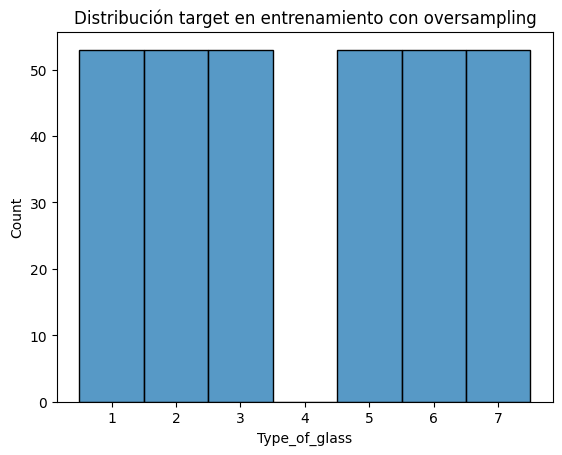

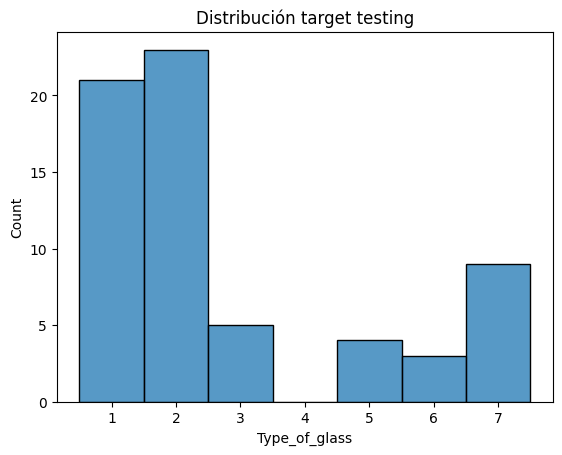

In [27]:
X = pd.DataFrame(X)
X['Type_of_glass'] = y.astype(int).values
X.columns = [col for col in df.columns if col not in ["Id_number"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

df_aux = pd.DataFrame()
frecuencias = X_train['Type_of_glass'].value_counts().to_dict()
frecuencias = list(frecuencias.items())
mayor_cat = frecuencias[0][0]
mayor_cant= frecuencias[0][1]
for categoria,cantidad in frecuencias[1:]:
    filtro = X_train['Type_of_glass'] == categoria
    df_temp = X_train[filtro].sample(
        n=mayor_cant-cantidad, 
        replace=True, 
        random_state=17, 
        axis=0, 
        ignore_index=True
    )
    df_aux = pd.concat([df_aux, df_temp],ignore_index=True)
X_train = pd.concat([X_train, df_aux],ignore_index=True)


sns.histplot(X_train, x='Type_of_glass', discrete=True)
plt.title("Distribución target en entrenamiento con oversampling")
plt.show()

sns.histplot(X_test, x='Type_of_glass', discrete=True)
plt.title("Distribución target testing")
plt.show()

y_train = X_train['Type_of_glass']
y_test = X_test['Type_of_glass']
X_train.drop(['Type_of_glass'], axis = 1, inplace=True)
X_test.drop(['Type_of_glass'], axis = 1, inplace=True)



Se usa GridSearchCV para el tune de hiper-parámetros, donde se entrega una grilla de posibles hiper-parámetros y recorre cada modelo posible usando validación cruzada de 3 particiones. Internamente, lo que realiza es entrenar con diferentes usando 2 particioners y testear con la restante usando una métrica de score definida por el usuario. En este caso, se usa neg_log_loss la cual penaliza predicciones de alta probabilidad que sean incorrectas, la cual se elige por sobre accuracy, ya que se posee un cierto nivel de desbalance en los datos

In [22]:
clf_rf = RandomForestClassifier(random_state=42, bootstrap=True)

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Tune de hiper-parámetros
model_random_forest = GridSearchCV(estimator=clf_rf, param_grid=param_grid, 
                           scoring='neg_log_loss', cv=3, verbose=2, n_jobs=-1)

model_random_forest.fit(X_train, y_train)
preds_random_forest = model_random_forest.predict(X_test)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Users\Diego\anaconda3\envs\udd_python_proyecto\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [23]:
model_random_forest.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)

In [24]:
clf_gb = GradientBoostingClassifier(random_state=42)

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [1, 0.1]
}

# Tune de hiper-parámetros
model_gradient_boosting = GridSearchCV(estimator=clf_gb, param_grid=param_grid, 
                           scoring='neg_log_loss', cv=3, verbose=2, n_jobs=-1)

model_gradient_boosting.fit(X_train, y_train)
preds_gradient_boosting = model_gradient_boosting.predict(X_test)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\Users\Diego\anaconda3\envs\udd_python_proyecto\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [25]:
model_gradient_boosting.best_estimator_

GradientBoostingClassifier(max_depth=30, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=50,
                           random_state=42)

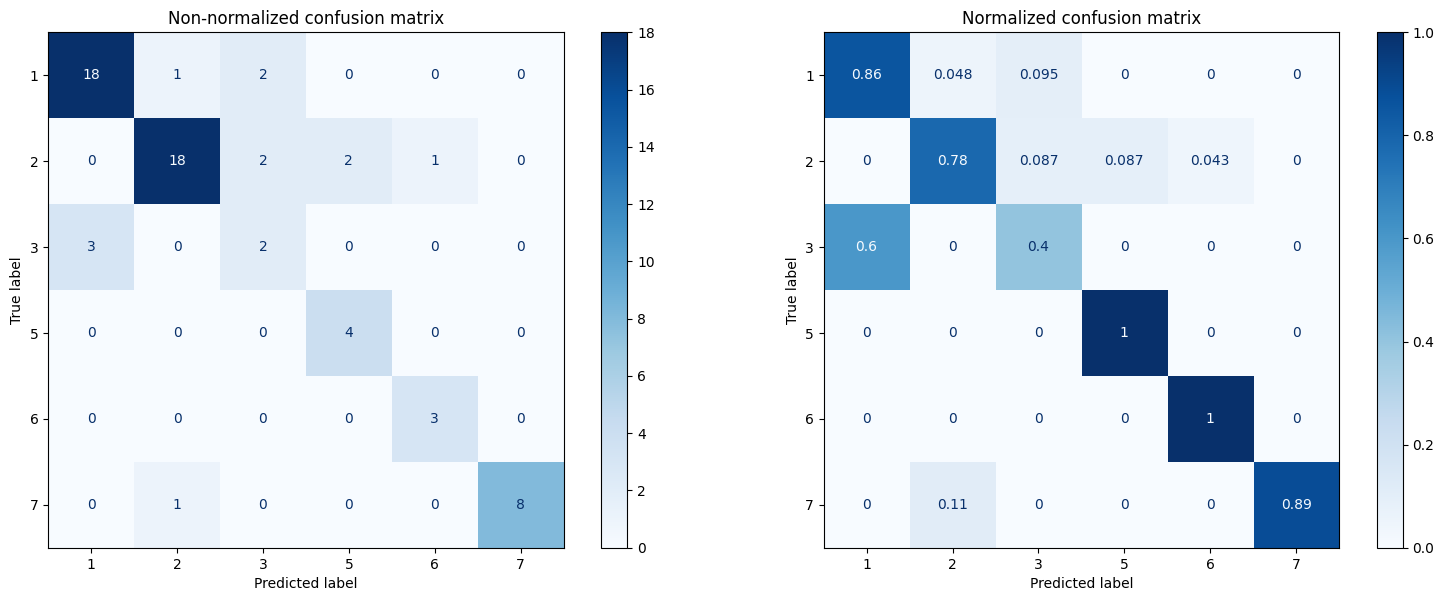

In [28]:
custom_confusion_matrix(y_test, preds_random_forest, ["1", "2", "3", "5", "6", "7"])

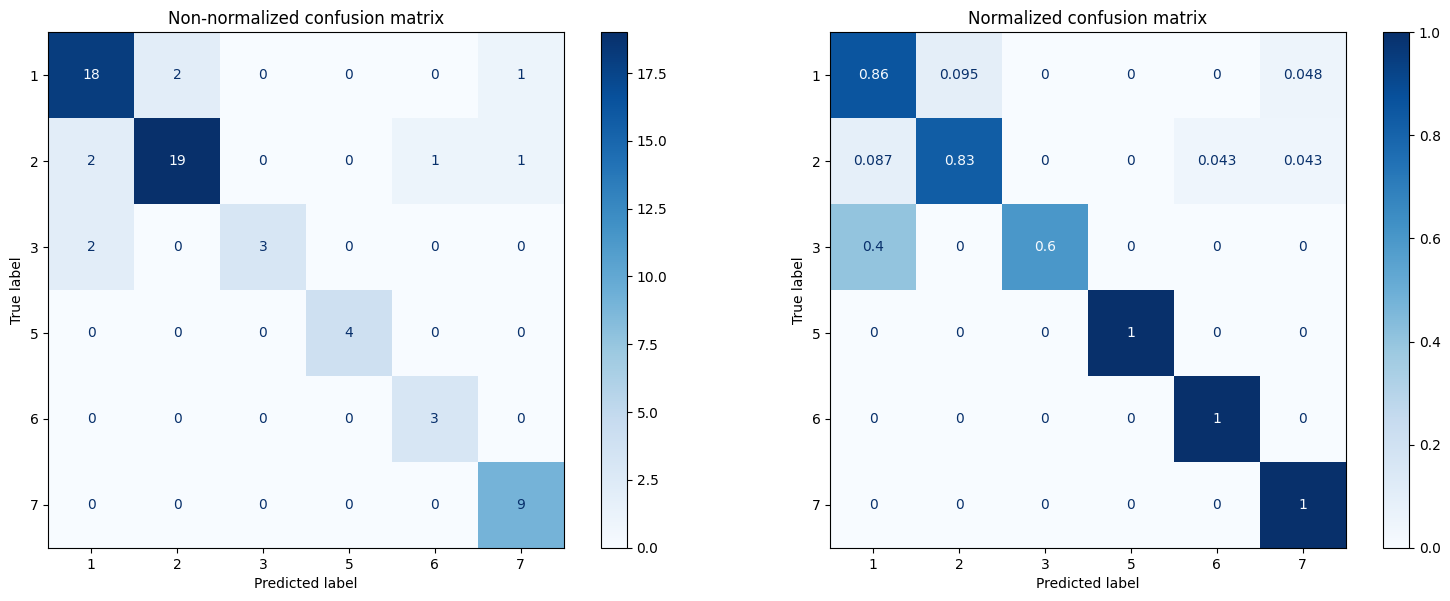

In [29]:
custom_confusion_matrix(y_test, preds_gradient_boosting, ["1", "2", "3", "5", "6", "7"])

In [30]:
print(classification_report(y_test, preds_random_forest))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        21
           2       0.90      0.78      0.84        23
           3       0.33      0.40      0.36         5
           5       0.67      1.00      0.80         4
           6       0.75      1.00      0.86         3
           7       1.00      0.89      0.94         9

    accuracy                           0.82        65
   macro avg       0.75      0.82      0.78        65
weighted avg       0.84      0.82      0.82        65



In [31]:
print(classification_report(y_test, preds_gradient_boosting))

              precision    recall  f1-score   support

           1       0.82      0.86      0.84        21
           2       0.90      0.83      0.86        23
           3       1.00      0.60      0.75         5
           5       1.00      1.00      1.00         4
           6       0.75      1.00      0.86         3
           7       0.82      1.00      0.90         9

    accuracy                           0.86        65
   macro avg       0.88      0.88      0.87        65
weighted avg       0.87      0.86      0.86        65

